In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image_path = '../cropped_image.jpg'
image = cv2.imread(image_path)

array([[[ 87, 150, 106],
        [ 87, 150, 106],
        [ 87, 150, 106],
        ...,
        [ 85, 150, 105],
        [ 87, 150, 106],
        [ 87, 150, 106]],

       [[ 87, 150, 106],
        [ 87, 150, 106],
        [ 87, 150, 106],
        ...,
        [ 85, 150, 105],
        [ 87, 150, 106],
        [ 86, 149, 105]],

       [[ 87, 148, 104],
        [ 87, 148, 104],
        [ 87, 148, 104],
        ...,
        [ 85, 148, 104],
        [ 85, 148, 104],
        [ 84, 147, 103]],

       ...,

       [[ 89, 142,  99],
        [ 86, 139,  96],
        [ 86, 139,  96],
        ...,
        [130, 163, 119],
        [141, 174, 130],
        [147, 180, 136]],

       [[ 93, 149, 108],
        [ 93, 149, 108],
        [ 95, 149, 106],
        ...,
        [ 85, 128,  85],
        [104, 144, 102],
        [120, 160, 118]],

       [[ 88, 146, 105],
        [ 87, 145, 104],
        [ 88, 144, 101],
        ...,
        [ 91, 137,  94],
        [ 96, 140,  99],
        [100, 144, 103]]

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

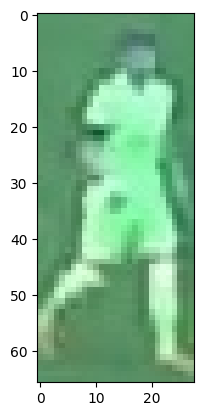

In [6]:
plt.imshow(image)

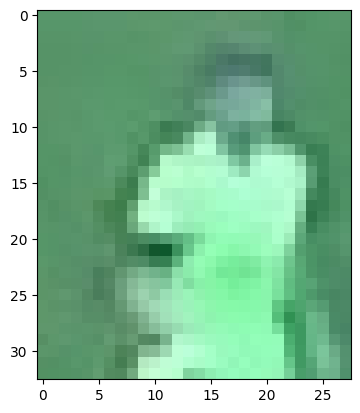

In [7]:
top_half_image = image[0 : int(image.shape[0] / 2), :]
plt.imshow(top_half_image)

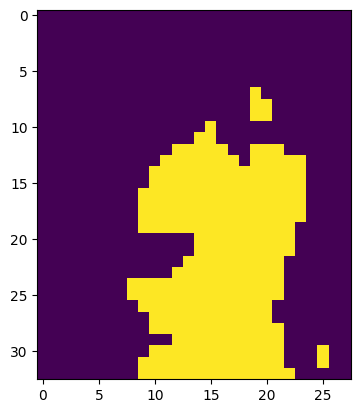

In [11]:
image_2d = top_half_image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [12]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)

In [13]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [14]:
kmeans.cluster_centers_[player_cluster]

array([154.28571429, 239.64285714, 185.38345865])